
<strong><center>Created by Riley Livingston @ https://github.com/Riley-livingston </center></strong>

### Predicting Airbnb Listings Prices/Night in NYC - Neural Networks, TensorFLow's Keras API

All Data sources and Data Info can be found here - http://insideairbnb.com/

### Creating a searchable dictionary for dataset feature descriptions and initial package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv("C:\\Users\\riley\\OneDrive\Desktop\\Data Portfolio Project\\airbnb_price_predictions\\airbnb_data\\Airbnb Data Dictionary.csv", index_col='Field')

In [3]:
print(data_info.loc['id']['Description'])

Airbnb's unique identifier for the listing


In [4]:
def feat_info(col_name):
     '''Feed feature name as the argument. Returns the description of the feature.'''
     print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('price')

daily price in local currency


 ### Converting the CSV file into a Pandas DataFrame

In [6]:
df = pd.read_csv("C:\\Users\\riley\\OneDrive\Desktop\\Data Portfolio Project\\airbnb_price_predictions\\airbnb_data\\listings.csv")

C:\Users\riley\AppData\Local\Temp\ipykernel_11236\3522405283.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\riley\\OneDrive\Desktop\\Data Portfolio Project\\airbnb_price_predictions\\airbnb_data\\listings.csv")


### Data Cleaning and Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,5.00,4.75,4.88,NaN,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.31
3,45910,https://www.airbnb.com/rooms/45910,20220907064715,2022-09-07,city scrape,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",NaN,https://a0.muscache.com/pictures/27117627/19ff...,204539,...,5.00,4.82,4.55,NaN,f,6,6,0,0,0.10
4,5136,https://www.airbnb.com/rooms/5136,20220907064715,2022-09-07,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03


In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
df = df.drop(['host_id', 'host_since', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'neighbourhood', 'latitude', 'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],axis=1)

columns that contain unique ids, descriptions, and URLs are dropped from the DataFrame because they aren't meaningful  predictors of the price per night of a listing and we don't plan on doing any joins in this analysis.

In [11]:
df['price'].value_counts()

$150.00      1164
$100.00       991
$200.00       877
$75.00        730
$80.00        712
             ... 
$491.00         1
$1,446.00       1
$1,229.00       1
$739.00         1
$1,871.00       1
Name: price, Length: 1049, dtype: int64

In [12]:
df['price'] = df.price.apply(lambda x: x.replace('$',''))
df['price'] = df.price.apply(lambda x: x.replace(',', ''))
df['price'] = df.price.apply(pd.to_numeric)

The dollar signs and commas are dropped from the price per night feature so we can transform it to an Integer and use it to preform operations. This is the feature we are trying to predict in this analaysis

<AxesSubplot: xlabel='host_has_profile_pic', ylabel='count'>

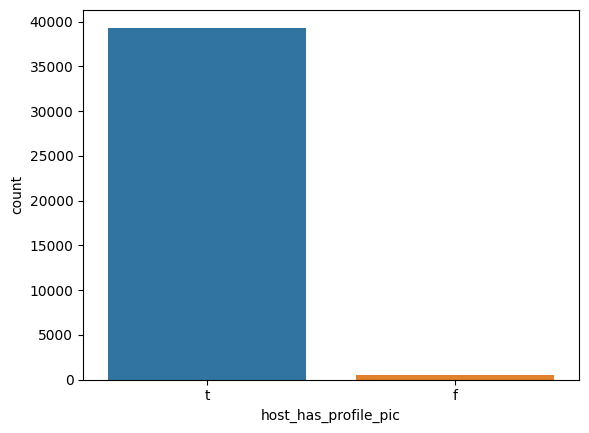

In [13]:
sns.countplot(data=df, x='host_has_profile_pic')

In [14]:
df['host_has_profile_pic'].value_counts()

t    39336
f      495
Name: host_has_profile_pic, dtype: int64

<AxesSubplot: xlabel='host_identity_verified', ylabel='count'>

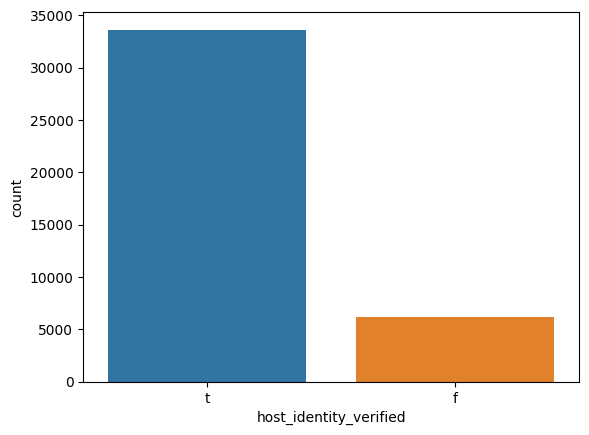

In [15]:
sns.countplot(data=df, x='host_identity_verified')

In [16]:
df['host_identity_verified'].value_counts()

t    33635
f     6196
Name: host_identity_verified, dtype: int64

In [17]:
df.isnull().sum()/(len(df)) * 100

host_response_time               33.971064
host_response_rate               33.971064
host_acceptance_rate             29.740979
host_is_superhost                 0.072716
host_has_profile_pic              0.125373
host_identity_verified            0.125373
neighbourhood_cleansed            0.000000
neighbourhood_group_cleansed      0.000000
property_type                     0.000000
room_type                         0.000000
accommodates                      0.000000
bathrooms                       100.000000
bathrooms_text                    0.210627
bedrooms                          9.485720
beds                              2.216594
amenities                         0.000000
price                             0.000000
minimum_nights                    0.000000
maximum_nights                    0.000000
calendar_updated                100.000000
has_availability                  0.000000
availability_30                   0.000000
availability_60                   0.000000
availabilit

Dsiplays the null values of each feature as a percent of the total observations.

In [18]:
df = df.drop(['calendar_updated', 'bathrooms'], axis=1)

Features with 100% of the instances being null ('calender_updated' and 'bathrooms') are dropped. Later on, we will figure out what to do with the rest of the features containing null values.

In [19]:
df = df.dropna(subset=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms_text'])

Rows are dropped for features where the total percent of null values is less than 1.

In [20]:
df.isnull().sum()/len(df) * 100

host_response_time              33.869223
host_response_rate              33.869223
host_acceptance_rate            29.629909
host_is_superhost                0.000000
host_has_profile_pic             0.000000
host_identity_verified           0.000000
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bathrooms_text                   0.000000
bedrooms                         9.434674
beds                             2.113367
amenities                        0.000000
price                            0.000000
minimum_nights                   0.000000
maximum_nights                   0.000000
has_availability                 0.000000
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
number_of_reviews                0

In [21]:
df = df.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

a large portion of these features are null so I chose to drop them instead of filling with a mean

In [22]:
df = df.drop(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'review_scores_value', 'review_scores_communication', 'reviews_per_month'], axis=1)

I dropped the review scores features becasue there are too many missing values to include it in the model. The null values for all of these features are over 20% of the total.

In [23]:
df = df.dropna(subset=['bedrooms'])

The null Bedrooms rows are drops. We will be using this feature to predict the null beds values.

In [24]:
beds_per_bedroom = df.groupby('bedrooms').mean().round()['beds']

C:\Users\riley\AppData\Local\Temp\ipykernel_11236\1892437022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beds_per_bedroom = df.groupby('bedrooms').mean().round()['beds']


A beds per bedroom object is created that contains the average beds for each unique bedrooms value.

In [25]:
def fill_beds(beds, bedrooms):
    """Accepts the beds and bedrooms values for the row.
    Checks if the beds is NaN , if so, it returns the avg beds value
    for the corresponding bedrooms value for that row.
    
    average beds here should be a Series or dictionary containing the mapping of the
    groupby averages of beds per bedrooms values."""
    if np.isnan(beds):
        return beds_per_bedroom[bedrooms]
    else:
        return beds

This function will itterate through each row and return the calculated average beds for each value of bedrooms where beds is null. Else the original beds value for that row is returned.

In [26]:
df['beds'] = df.apply(lambda x: fill_beds(x['bedrooms'], x['beds']), axis=1)

The mean rounded up value of beds per bedroom for each unique numnber of bedrooms is filled into the null rows of the beds column using the fill_beds function. 
( Example: A listing with 3 bedrooms and a null beds will be filled with a value of 3 beds. )

In [27]:
df.isnull().sum()/len(df) * 100

host_is_superhost               0.0
host_has_profile_pic            0.0
host_identity_verified          0.0
neighbourhood_cleansed          0.0
neighbourhood_group_cleansed    0.0
property_type                   0.0
room_type                       0.0
accommodates                    0.0
bathrooms_text                  0.0
bedrooms                        0.0
beds                            0.0
amenities                       0.0
price                           0.0
minimum_nights                  0.0
maximum_nights                  0.0
has_availability                0.0
availability_30                 0.0
availability_60                 0.0
availability_90                 0.0
availability_365                0.0
number_of_reviews               0.0
instant_bookable                0.0
dtype: float64

No remaining features have null values. Thats it for preprocessing.

### Feature Engineering

In [28]:
df['bathrooms_text'].head()

0     1 shared bath
3         2.5 baths
4         1.5 baths
5     1 shared bath
6    1 private bath
Name: bathrooms_text, dtype: object

In [29]:
df['bathrooms_text'].value_counts()

1 bath               17823
1 shared bath         9042
2 baths               2582
1 private bath        2542
1.5 baths             1085
2 shared baths        1037
1.5 shared baths       693
2.5 baths              383
3 baths                244
3.5 baths               88
3 shared baths          86
0 shared baths          86
2.5 shared baths        79
4 baths                 65
0 baths                 37
Half-bath               28
4.5 baths               26
Shared half-bath        18
4 shared baths          12
Private half-bath       10
5.5 baths                9
5 baths                  6
6 baths                  6
4.5 shared baths         2
6.5 baths                2
6 shared baths           2
3.5 shared baths         1
7.5 baths                1
7 baths                  1
9.5 baths                1
Name: bathrooms_text, dtype: int64

Instead of turning every unique bathroom value into a dummy variable I chose to split bathrooms feature between shared and private.

In [30]:
def bath_type(bathroom):
    """This function returns a 1 if the bathroom_text string contains the word 
    string and 0 otherwise indicating a private bathroom """
    if "shared" in bathroom:
        return 1
    else:
        return 0

To make a shared_baths feature first I created a function that returns a 1 if the bathroom is shared and 0 otherwise indicating a private bathroom.

In [31]:
df['shared_baths'] = df['bathrooms_text'].apply(bath_type)

The function is then applied to the bathrooms_text column, each row is iterated through.

In [32]:
df['shared_baths'].value_counts()

0    24957
1    11040
Name: shared_baths, dtype: int64

In [33]:
df = df.drop('bathrooms_text', axis=1)

the original bathrooms_text column is finally dropped

<AxesSubplot: xlabel='availability_365', ylabel='Count'>

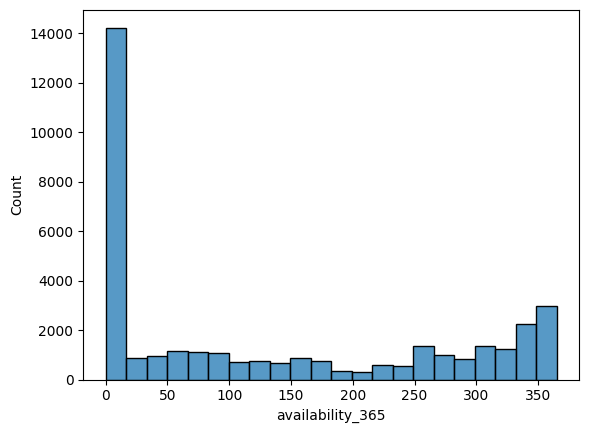

In [34]:
sns.histplot(data=df, x='availability_365')

<AxesSubplot: xlabel='availability_90', ylabel='Count'>

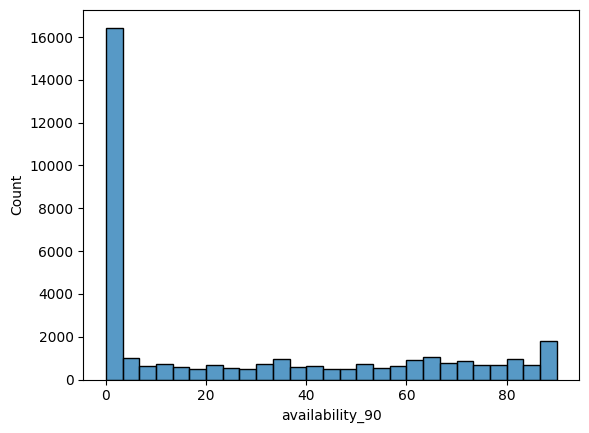

In [35]:
sns.histplot(data = df, x='availability_90')

<AxesSubplot: xlabel='availability_60', ylabel='Count'>

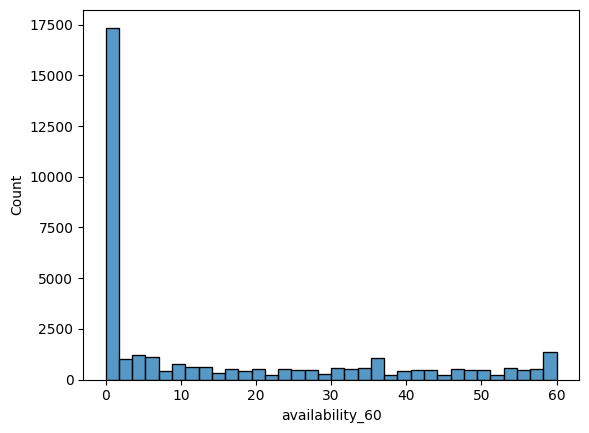

In [36]:
sns.histplot(data = df, x='availability_60')

<AxesSubplot: xlabel='availability_30', ylabel='Count'>

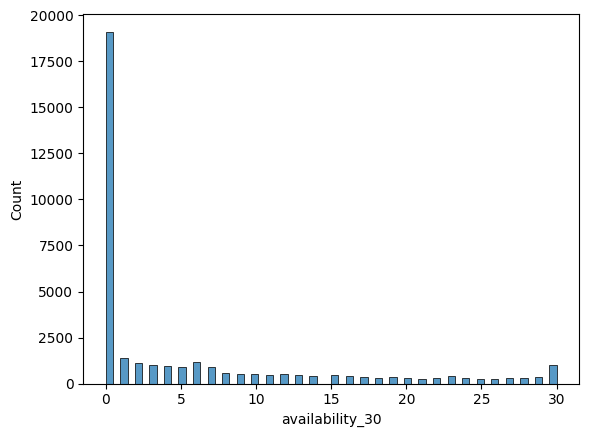

In [37]:
sns.histplot(data = df, x='availability_30')

In [38]:
df = df[df['availability_365'] > 0]
df = df[df['availability_365'] < 365]

In [39]:
df = df.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1)

Since we wont know days booked ahead of team when predicting a price per night for a potential airbnb in NYC it doesnt make sense to include it in the model as a feature. Therefore, the availibilty columns are dropped fromn this analysis.

In [40]:
def has_availability_checker(row):
    if row =='t':
        return 1
    else:
        return 0

In [41]:
df['has_availability'] = df['has_availability'].apply(has_availability_checker)

iterates through each row and returns a 1 where the 'has_availability' column == 't', 0 otherwise. 

In [42]:
df.select_dtypes(['object']).columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'amenities', 'instant_bookable'],
      dtype='object')

In [43]:
df['host_is_superhost'].value_counts()

f    15604
t     6881
Name: host_is_superhost, dtype: int64

In [44]:
def super_host_checker(host):
    '''Returns a 0 if 'host_is_superhost == 'f', 1 otherwise '''
    if host == 'f':
        return 0
    else:
        return 1

In [45]:
df['host_is_superhost'] = df['host_is_superhost'].apply(super_host_checker)

Itterates through each row and returns a 1 if 'host_is_superhost =='t', otherwise 0

In [46]:
df['host_is_superhost'].value_counts()

0    15604
1     6881
Name: host_is_superhost, dtype: int64

In [47]:
df['host_identity_verified'].value_counts()

t    19449
f     3036
Name: host_identity_verified, dtype: int64

In [48]:
def host_verified_conversion(host):
    '''Returns a 1 if host_identity_verified =='t', 0 otherwise'''
    if host=='t':
        return 1
    else:
        return 0

In [49]:
df['host_identity_verified'] = df['host_identity_verified'].apply(host_verified_conversion)

Itterates through each row and returns a 1 if 'host_identity_verified =='t', otherwise 0

In [50]:
df['host_identity_verified'].value_counts()

1    19449
0     3036
Name: host_identity_verified, dtype: int64

In [51]:
df['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    1732
Harlem                1069
Williamsburg          1064
Hell's Kitchen         925
Bushwick               912
                      ... 
Bloomfield               1
Pelham Islands           1
Woodrow                  1
Hollis Hills             1
Willowbrook              1
Name: neighbourhood_cleansed, Length: 241, dtype: int64

In [52]:
neighbourhood_value_counts = df['neighbourhood_cleansed'].value_counts()
to_remove = neighbourhood_value_counts[neighbourhood_value_counts > 20].index
df = df[df.neighbourhood_cleansed.isin(to_remove)]

Removes neighbourhoods with less than 20 observations. Neighbourhoods when converted to dummy variables that have less than 10 - 20 instances will have almost no predictive power in estimating price.

In [53]:
df['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    1732
Harlem                1069
Williamsburg          1064
Hell's Kitchen         925
Bushwick               912
                      ... 
Baychester              22
Eastchester             22
Kew Gardens Hills       22
College Point           22
Briarwood               22
Name: neighbourhood_cleansed, Length: 128, dtype: int64

With neighbourhoods with less than 20 observations removed we reduced the number of dummy variables we will have from 243 to 148.

In [54]:
df['neighbourhood_group_cleansed'].value_counts()

Manhattan        8466
Brooklyn         8154
Queens           3977
Bronx             817
Staten Island     126
Name: neighbourhood_group_cleansed, dtype: int64

In [55]:
df = df.drop('neighbourhood_group_cleansed', axis=1)

Neighbourhood_group_cleasned is dropped from the dataframe becasue the group can be determined from the next level of granularity in the neighbourhood_cleansed feature.

In [56]:
neighbourhood_dummies= pd.get_dummies(df['neighbourhood_cleansed'], drop_first=True)

In [57]:
df = pd.concat([df.drop('neighbourhood_cleansed',axis=1),neighbourhood_dummies],axis=1)

In [58]:
df.shape

(21540, 143)

In [59]:
df['property_type'].value_counts()

Entire rental unit              8533
Private room in rental unit     4953
Private room in home            1333
Entire condo                    1067
Entire home                     1009
                                ... 
Castle                             1
Private room in cottage            1
Shared room                        1
Shared room in vacation home       1
Private room in barn               1
Name: property_type, Length: 61, dtype: int64

In [60]:
proprty_type_value_counts = df['property_type'].value_counts()
to_remove_property_type = proprty_type_value_counts[proprty_type_value_counts > 20].index
df = df[df.property_type.isin(to_remove_property_type)]

In [61]:
df['property_type'].value_counts()

Entire rental unit                    8533
Private room in rental unit           4953
Private room in home                  1333
Entire condo                          1067
Entire home                           1009
Private room in townhouse              635
Room in hotel                          481
Entire townhouse                       458
Entire serviced apartment              433
Entire loft                            404
Private room in condo                  393
Room in boutique hotel                 295
Private room in serviced apartment     274
Entire guest suite                     268
Shared room in rental unit             225
Private room in loft                   130
Private room in guest suite             97
Private room in casa particular         73
Private room in bed and breakfast       48
Entire vacation home                    44
Entire guesthouse                       42
Private room                            31
Shared room in home                     28
Room in apa

In [62]:
property_type_dummies = pd.get_dummies(df['property_type'], drop_first=True)

In [63]:
df = pd.concat([df.drop('property_type',axis=1),property_type_dummies],axis=1)

In [64]:
df['room_type'].value_counts()

Entire home/apt    12328
Private room        8659
Shared room          253
Hotel room           136
Name: room_type, dtype: int64

In [65]:
room_type_dummies = pd.get_dummies(df['room_type'], drop_first=True)

In [66]:
df= pd.concat([df.drop('room_type', axis=1), room_type_dummies], axis=1)

In [67]:
df['instant_bookable'].value_counts()

f    13992
t     7384
Name: instant_bookable, dtype: int64

In [68]:
def instant_bookable_checker(listing):
    """Returns a 1 if listing is instant bookable, otherwise 0"""
    if listing =='t':
        return 1
    else:
        return 0


In [69]:
df['instant_bookable'] = df['instant_bookable'].apply(instant_bookable_checker)

Iterates through each row and returns 1 where instant_bookable == 't, Returns 0 otherwise

In [70]:
df['instant_bookable'].value_counts()

0    13992
1     7384
Name: instant_bookable, dtype: int64

In [71]:
def has_profile_pic_checker(pic):
    """Returns a 1 if host_has_profile_pic =='t", otherwise, returns 0"""
    if pic =='t':
        return 1
    else:
        return 0

In [72]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(has_profile_pic_checker)

Iterates through each row and replaces 't' with a '1' and 'f' with '0' in the host_has_profile_pic column.

In [73]:
df.select_dtypes(['object']).columns

Index(['amenities'], dtype='object')

In [74]:
df['amenities'].head(40)

0     ["First aid kit", "Microwave", "Stove", "Coffe...
4     ["Hair dryer", "Cable TV", "Refrigerator", "BB...
5     ["First aid kit", "Essentials", "Breakfast", "...
6     ["First aid kit", "Coffee maker", "Gym", "Long...
7     ["Body soap", "Microwave", "Laundromat nearby"...
8     ["Essentials", "Oven", "Cable TV", "Refrigerat...
9     ["Coffee maker", "Gym", "Long term stays allow...
10    ["First aid kit", "Coffee maker", "Gym", "Long...
11    ["Breakfast", "Cable TV", "Elevator", "Heating...
13    ["First aid kit", "Body soap", "Microwave", "L...
14    ["First aid kit", "Fast wifi \u2013 456 Mbps",...
15    ["Microwave", "Stove", "Coffee maker", "Long t...
16    ["Cable TV", "Microwave", "Heating", "Free str...
18    ["First aid kit", "Coffee maker", "Gym", "Long...
19    ["First aid kit", "Body soap", "Microwave", "L...
21    ["Paid parking garage off premises", "Luggage ...
22    ["Body soap", "Fast wifi \u2013 113 Mbps", "Mi...
23    ["Microwave", "Laundromat nearby", "Stove"

In [75]:
def elevator_checker(row):
    if 'elevator' in row.lower():
        return 1
    else:
        return 0

In [76]:
def dedicated_workspace_checker(row):
    if 'workspace' in row.lower():
        return 1
    else:
        return 0

In [77]:
def wifi_checker(row):
    """Checks to see if 'wifi' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    if 'wifi' in row.lower():
        return 1
    else:
        return 0
    

In [78]:
def gym_checker(row):
    '''Checks to see if 'gym' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    '''
    if "gym" in row.lower():
        return 1
    else:
        return 0

In [79]:
def long_term_checker(row):
    """Checks to see if 'long term stays allowed' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    if 'long term stays allow' in row.lower():
        return 1
    else:
        return 0


In [80]:
def parking_checker(row):
    '''Checks to see if 'parking' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0'''
    if 'parking' in row.lower():
        return 1
    else:
        return 0

In [81]:
def laundy_checker(row):
    if 'laundr' in row.lower():
        return 1
    else:
        return 0

In [82]:
def cable_checker(row):
    if 'cable' in row.lower():
        return 1
    else:
        return 0

In [83]:
df['elevator'] = df['amenities'].apply(elevator_checker)

In [84]:
df['wifi'] = df['amenities'].apply(wifi_checker)

In [85]:
df['wifi'].value_counts()

1    21099
0      277
Name: wifi, dtype: int64

In [86]:
df['gym'] = df['amenities'].apply(gym_checker)

In [87]:
df['gym'].value_counts()

0    19315
1     2061
Name: gym, dtype: int64

In [88]:
df['parking'] = df['amenities'].apply(parking_checker)

In [89]:
df['parking'].value_counts()

1    13118
0     8258
Name: parking, dtype: int64

In [90]:
df['long_term_stays_allowed'] = df['amenities'].apply(long_term_checker)

In [91]:
df['long_term_stays_allowed'].value_counts()

1    18874
0     2502
Name: long_term_stays_allowed, dtype: int64

In [92]:
df['dedicated_worksapce'] = df['amenities'].apply(dedicated_workspace_checker)

In [93]:
df['dedicated_worksapce'].value_counts()

1    10894
0    10482
Name: dedicated_worksapce, dtype: int64

In [94]:
df['laundry'] = df['amenities'].apply(laundy_checker)

In [95]:
df['laundry'].value_counts()

0    15191
1     6185
Name: laundry, dtype: int64

In [96]:
df['cable'] = df['amenities'].apply(cable_checker)

In [97]:
df['cable'].value_counts()

0    17479
1     3897
Name: cable, dtype: int64

In [98]:
df = df.drop('amenities', axis=1)

After the desired features are engineered from the ammenities column, the original column is dropped from the dataset.

In [99]:
df.corr()['price'].sort_values()

shared_baths                  -0.273731
Private room                  -0.236778
Private room in rental unit   -0.210151
Private room in home          -0.118070
Private room in townhouse     -0.074166
                                 ...   
gym                            0.203958
beds                           0.347121
bedrooms                       0.347121
accommodates                   0.397136
price                          1.000000
Name: price, Length: 178, dtype: float64

In [100]:
df.shape

(21376, 178)

In [101]:
# features
X = df.drop('price', axis=1)

In [102]:
# price is the label we are trying to predict
y = df['price']

# Preprocessing the Data, Model Creation, Model Compiling, Model Training, Model Evaluation, Model Adjustments

### Preprocessing: Using principal component analysis to reduce the dimensionality of the data

In [103]:
from sklearn.decomposition import PCA

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

In [106]:
X_scaled = scaler.fit_transform(X)

In [107]:
def pca_plot(pca=5):
    """plot"""

    pca_X = PCA(n_components=pca)

    pca_X.fit(X_scaled)
    X_X = pca_X.transform(X_scaled)

    X_cumsum = np.cumsum(pca_X.explained_variance_ratio_ * 100)

    plt.plot(X_cumsum)
    plt.title(f'Principal Component analysis finding the {pca} most important features')
    plt.show()

    print(f'{X_cumsum} \n \n THe {pca} most important features contains\033[1m{X_cumsum[-1]:.2f} \033[0m% of the information in the features. \n')

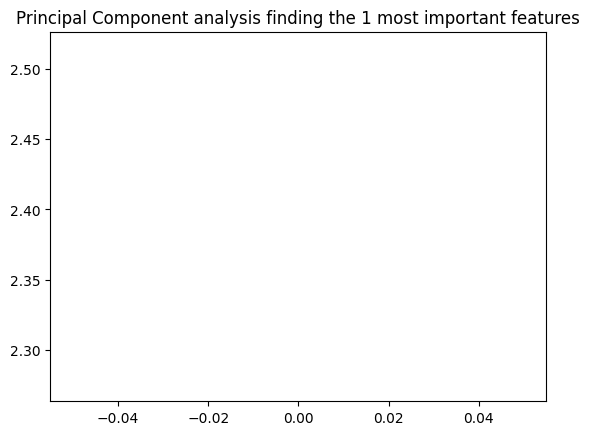

[2.39499837] 
 
 THe 1 most important features contains2.39 % of the information in the features. 



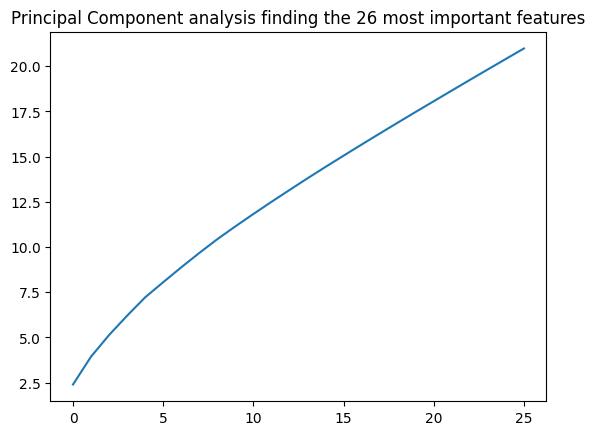

[ 2.39498402  3.93712092  5.13279718  6.20222106  7.2171211   8.05373401
  8.87631224  9.67188643 10.4349133  11.1424212  11.82829302 12.49914301
 13.15472616 13.80204843 14.43533733 15.05530699 15.67024929 16.27858624
 16.88083265 17.47800011 18.06855933 18.65874862 19.24711115 19.82978906
 20.40892284 20.98722622] 
 
 THe 26 most important features contains20.99 % of the information in the features. 



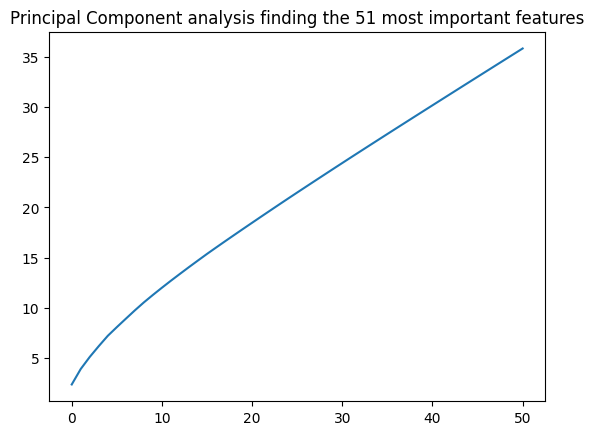

[ 2.3949898   3.9379325   5.13769289  6.21147309  7.23683306  8.09729604
  8.93546726  9.76646968 10.56022992 11.30073934 12.01721948 12.71584447
 13.39643031 14.0688244  14.72711022 15.37984981 16.01029456 16.63553878
 17.25313209 17.86834827 18.47804426 19.08654843 19.69080791 20.29387378
 20.89249912 21.4864618  22.07677886 22.66593592 23.25270814 23.83872812
 24.42120615 25.00297477 25.58051263 26.15767372 26.73279521 27.30656674
 27.87925566 28.45040169 29.02092935 29.59006327 30.15840643 30.7264158
 31.29367764 31.86076425 32.42700655 32.99241061 33.55752017 34.12235303
 34.68644157 35.24987114 35.81236556] 
 
 THe 51 most important features contains35.81 % of the information in the features. 



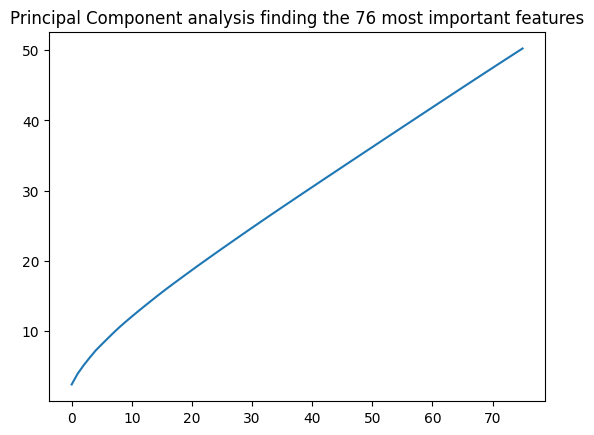

[ 2.39499237  3.93806879  5.13847276  6.21422706  7.24074313  8.10850156
  8.95645378  9.79648168 10.59770064 11.34348682 12.07067592 12.77989853
 13.47565489 14.16368816 14.84517483 15.51372426 16.16722033 16.80389799
 17.43454813 18.06323145 18.68955563 19.30965049 19.92287398 20.53146359
 21.13732879 21.73979684 22.33954738 22.9371311  23.53328764 24.12759964
 24.71886737 25.3066403  25.89271231 26.47834466 27.05824379 27.6369542
 28.21395703 28.78977711 29.36498367 29.93940435 30.51242327 31.08456924
 31.65637125 32.22760374 32.79790875 33.3674456  33.9363909  34.50505711
 35.07335581 35.64146408 36.20941442 36.77667421 37.34379752 37.91070717
 38.47713748 39.04349775 39.60979554 40.17592806 40.74177593 41.30738271
 41.87231687 42.43684835 43.00110411 43.56460737 44.12776316 44.69034346
 45.25222525 45.81300987 46.37296905 46.93197463 47.48988758 48.04586671
 48.60128822 49.15539794 49.70759382 50.25805949] 
 
 THe 76 most important features contains50.26 % of the information in th

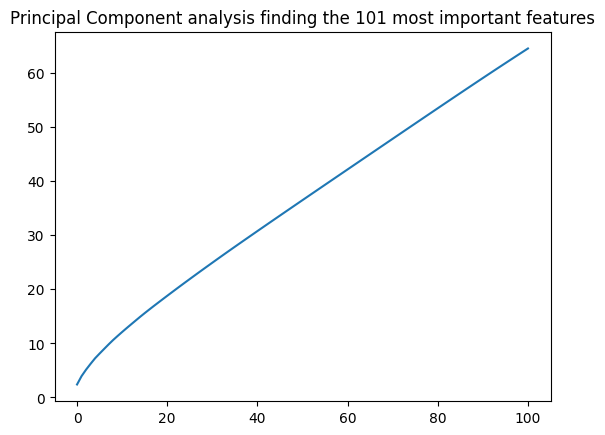

[ 2.39499545  3.93811524  5.13877881  6.21527963  7.24256589  8.11504339
  8.96588409  9.80989726 10.61851451 11.37143507 12.10489077 12.8224672
 13.52460122 14.22376065 14.91834779 15.5926988  16.24866996 16.89777609
 17.53511864 18.17068411 18.80237692 19.42902486 20.05420516 20.67516385
 21.29096457 21.90241585 22.51194406 23.12032207 23.72238999 24.3221296
 24.92072935 25.51819378 26.11230936 26.70347457 27.29090448 27.87612152
 28.45829819 29.03835261 29.61779487 30.19633704 30.77456175 31.35061666
 31.92554792 32.49995836 33.07349815 33.64578488 34.21784489 34.78927758
 35.36000059 35.93005452 36.49957997 37.0687468  37.63783958 38.20654803
 38.775006   39.34314062 39.91115427 40.47899006 41.04662826 41.61421594
 42.18157129 42.74883311 43.31597764 43.8829761  44.44994353 45.01676216
 45.58348281 46.1501531  46.71677181 47.28326933 47.84962183 48.41592006
 48.9820977  49.5481482  50.11374552 50.67873837 51.24328396 51.80765848
 52.37165793 52.93526023 53.49854441 54.06150371 54.6

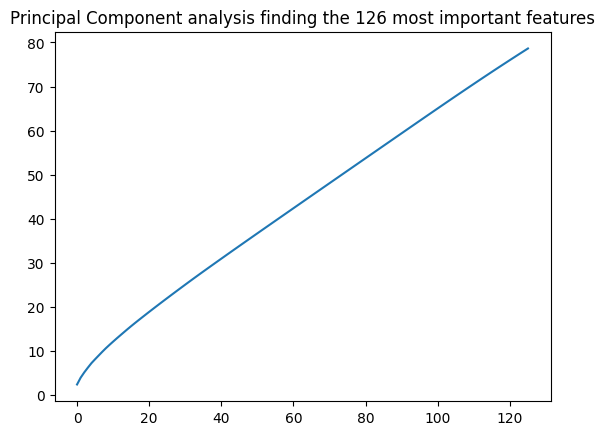

[ 2.39499823  3.93813851  5.13902237  6.21574641  7.24374906  8.11751724
  8.96996559  9.81597444 10.62782107 11.38613382 12.12278724 12.84619535
 13.55239414 14.253754   14.94987083 15.63113719 16.29589872 16.94737524
 17.59311048 18.23466713 18.87300052 19.50574687 20.13457012 20.7598313
 21.38134733 21.99768696 22.61288448 23.2252182  23.83515457 24.44289037
 25.04856331 25.65196735 26.25078734 26.84624061 27.43880285 28.02782827
 28.61387147 29.19800063 29.78008096 30.36163067 30.94126246 31.52072356
 32.09925602 32.6768203  33.25268605 33.82743478 34.40154181 34.97481623
 35.54787613 36.12047944 36.69249296 37.2639623  37.8348902  38.40487428
 38.97480582 39.54442238 40.11392677 40.68302413 41.25195846 41.82069527
 42.38930746 42.95785677 43.52621765 44.09441846 44.66251094 45.23046654
 45.79808356 46.36567003 46.9331302  47.5004815  48.06776475 48.63488753
 49.20197567 49.76889918 50.33579307 50.90263715 51.46942539 52.03615909
 52.60281944 53.16942672 53.73597086 54.30246539 54.

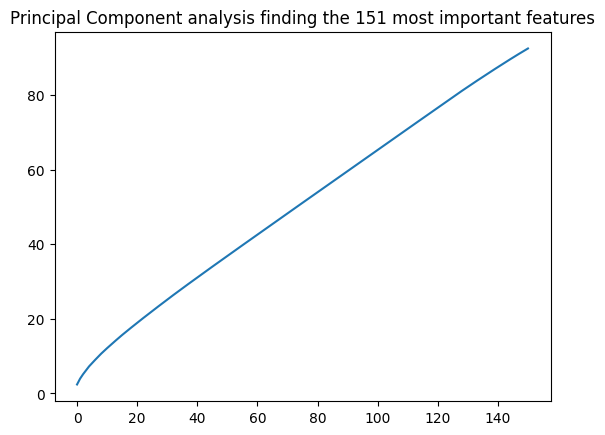

[ 2.39499859  3.93815784  5.13911925  6.21612487  7.24450987  8.11934849
  8.97243851  9.8198622  10.63288342 11.39244806 12.13176519 12.85677811
 13.56644618 14.27120476 14.97079742 15.65496838 16.32239365 16.97698216
 17.62545182 18.27116468 18.91252773 19.54884344 20.18243939 20.81140511
 21.43786651 22.05866261 22.67798856 23.29398092 23.90851987 24.52089994
 25.1323508  25.73890109 26.3419633  26.94128775 27.53866274 28.13051988
 28.72111906 29.30914976 29.89463495 30.47919462 31.06274938 31.64534268
 32.22627323 32.80648563 33.38529081 33.96240139 34.53924919 35.11563216
 35.69068316 36.26495204 36.83884947 37.41207931 37.98419839 38.55618501
 39.12740887 39.69840457 40.26892857 40.83902448 41.40890889 41.97868348
 42.54839649 43.11783429 43.68717101 44.25624903 44.82525127 45.39398644
 45.96264915 46.53106552 47.09939379 47.6676961  48.2358704  48.80388729
 49.37184388 49.93965673 50.50740696 51.07508159 51.64260685 52.21006599
 52.77749696 53.34486787 53.91214864 54.47937729 55

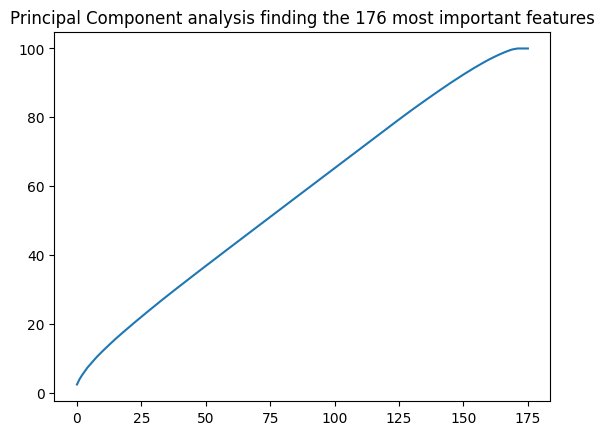

[  2.39499859   3.93815784   5.13911925   6.21612487   7.24450987
   8.11934849   8.97243851   9.8198622   10.63288342  11.39244806
  12.13176519  12.85677811  13.56644618  14.27120476  14.97079742
  15.65496838  16.32239365  16.97698216  17.62545182  18.27116468
  18.91252773  19.54884344  20.18243939  20.81140511  21.43786651
  22.05866261  22.67798856  23.29398092  23.90851987  24.52089994
  25.1323508   25.73890109  26.3419633   26.94128775  27.53866274
  28.13051988  28.72111906  29.30914976  29.89463495  30.47919462
  31.06274938  31.64534268  32.22627323  32.80648563  33.38529081
  33.96240139  34.53924919  35.11563216  35.69068316  36.26495204
  36.83884947  37.41207931  37.98419839  38.55618501  39.12740887
  39.69840457  40.26892857  40.83902448  41.40890889  41.97868348
  42.54839649  43.11783429  43.68717101  44.25624903  44.82525127
  45.39398644  45.96264915  46.53106552  47.09939379  47.6676961
  48.2358704   48.80388729  49.37184388  49.93965673  50.50740696
  51.075081

In [108]:
# prints the explained variance of the most imortant principal components from the range 1 to 200 with steps of 25
for n in range(1,200,25):
    pca_plot(pca=n)

### Model #1

In [391]:
import tensorflow as tf

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
# we choose the standard scaler for the first iteration of our model
scaler = StandardScaler()

In [111]:
# we fit and transform our features (X) onto the scaler so that every feature maintains the same range with values mean centered at 0 with unit variance. 
# scaling the data reduces computational costs and makes it easier for our nueral network to find patterns between features during the training process.
X_scaled = scaler.fit_transform(X)

In [112]:
from sklearn.decomposition import PCA

In [113]:
pca_X = PCA(n_components=151)
pca_X = pca_X.fit_transform(X_scaled)

We are able to reduce the feature dataframe from 177 features to 151 principal components, or by 15%, while maintaining ~92% of the information in the features.

Train-Test-Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.30)

The dataset is split into testing and training sets.

In [116]:
X_train.shape

(14963, 151)

In [117]:
X_test.shape

(6413, 151)

In [118]:
# importing relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [119]:
# 1. building the model
model = Sequential()

model.add(Dense(175,activation='relu'))

model.add(Dense(1))


In [120]:
# compiling the model
model.compile(optimizer='adam',loss='mse')

In [121]:
# training the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=100, verbose=0)

In [122]:
def loss_plot(model):
    '''Plots the training loss vs validation loss over each epoch.'''
    losses = pd.DataFrame(model.history.history)
    losses.plot()
    plt.title('Validation Loss vs Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Error')

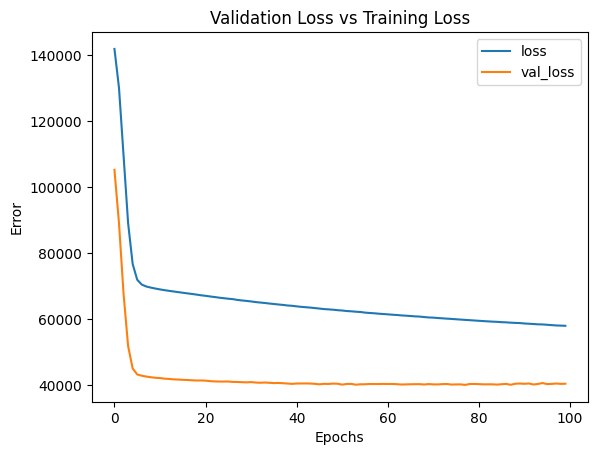

In [123]:
loss_plot(model)

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [125]:
# making predictions for price on unseen data(X_test)
predictions = model.predict(X_test)

201/201 [==============================] - 0s 700us/step


In [126]:
mae = mean_absolute_error(y_test, predictions)
mae

86.07269710197326

In [127]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
rmse

201.17788707497758

Becasue we are predicting price per night and want to be relativly percsie, we are choosing to focus on root mean squared error rather than the mean absolute error because we want to punish large errors in our predictions.

In [128]:
evs = explained_variance_score(y_test,predictions)
evs

0.39655489309449643

In [129]:
df['price'].mean()

214.45756923652695

In [130]:
df['price'].median()

150.0

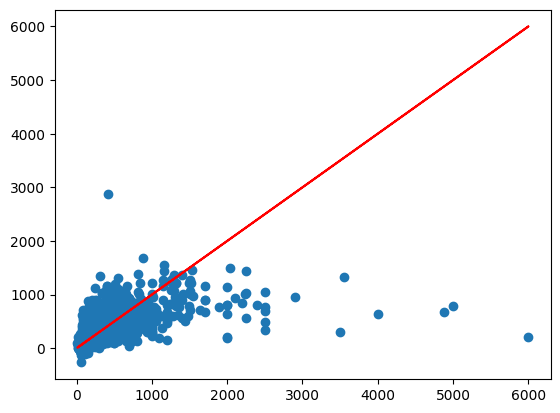

In [131]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

It looks like the vast majority of listings are less than $2000 per night and a few outliers are skewing the performance of our model.

In [132]:
errors = y_test.values.reshape(6413, 1) - predictions

C:\Users\riley\AppData\Local\Temp\ipykernel_11236\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<AxesSubplot: ylabel='Density'>

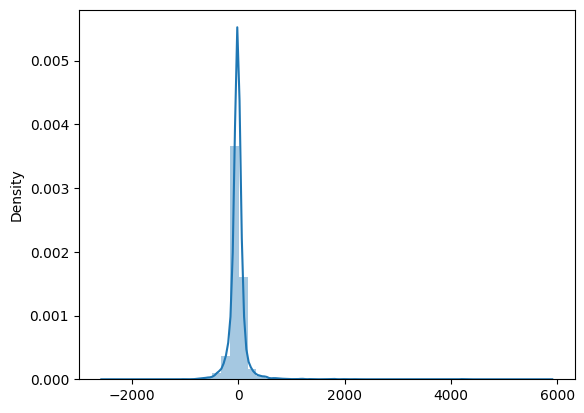

In [133]:
sns.distplot(errors)

<AxesSubplot: xlabel='price', ylabel='Count'>

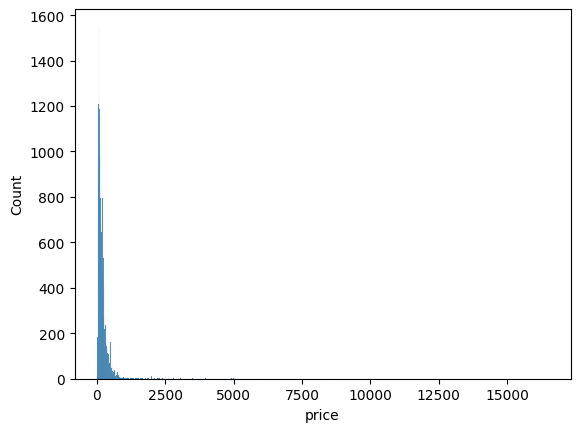

In [134]:
sns.histplot(data=df, x='price')

### Model #2
Adding a hidden layer with nodes containing half of the features

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

In [137]:
X_scaled = scaler.fit_transform(X)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

In [140]:
X_train.shape

(14963, 177)

In [141]:
X_test.shape

(6413, 177)

In [142]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [144]:
model_2 = Sequential()

model_2.add(Dense(175,activation='relu'))
model_2.add(Dense(88,activation='relu'))

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [145]:
model_2.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 128,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

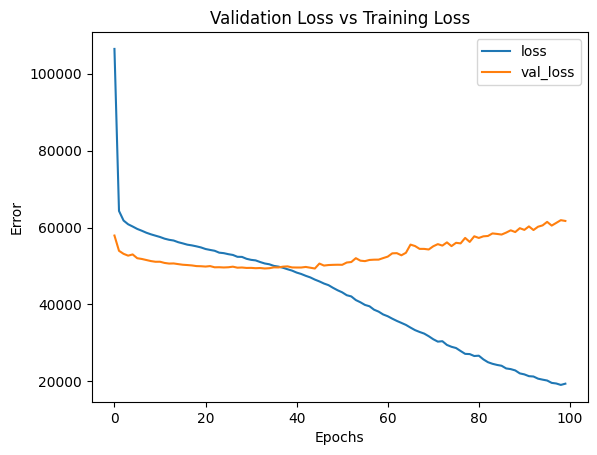

In [146]:
loss_plot(model_2)

In [147]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [148]:
predictions = model_2.predict(X_test)

201/201 [==============================] - 0s 725us/step


In [149]:
mae_2 = mean_absolute_error(y_test, predictions)
mae_2

100.93470916464756

In [150]:
rmse_2 = np.sqrt(mean_squared_error(y_test,predictions))
rmse_2

248.40071475562658

In [151]:
evs_2 = explained_variance_score(y_test,predictions)
evs_2

0.25353504079506284

In [152]:
df['price'].mean()

214.45756923652695

In [153]:
df['price'].median()

150.0

In [154]:
df['price'].std()

298.86045494993044

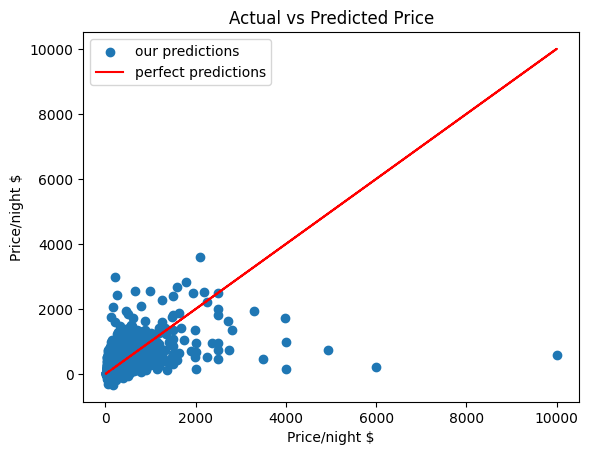

In [155]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [156]:
errors_2 = y_test.values.reshape(6413, 1) - predictions

C:\Users\riley\AppData\Local\Temp\ipykernel_11236\3930807623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


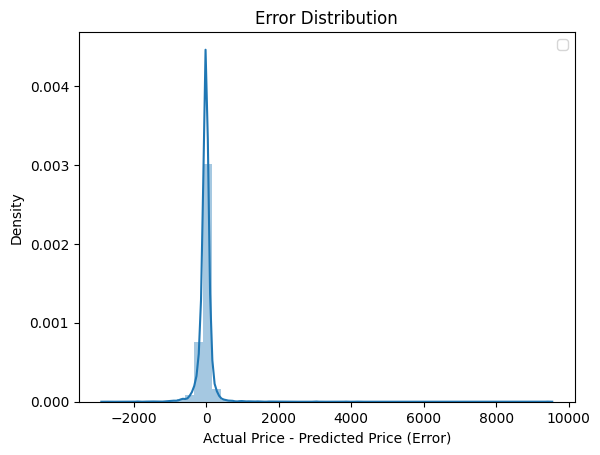

In [157]:
sns.distplot(errors_2)
plt.title('Error Distribution')
plt.xlabel('Actual Price - Predicted Price (Error)')
plt.legend()

Our error is normally distributed with an RMSE of about $77 per night and an MSE of $53 per night.

### Model # 3

<AxesSubplot: xlabel='price', ylabel='Count'>

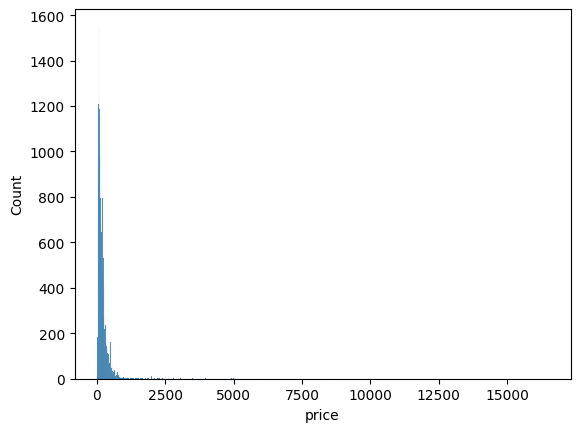

In [158]:
sns.histplot(data=df, x='price')

In [159]:
df = df[df['price'] <=600]

<AxesSubplot: xlabel='price', ylabel='Count'>

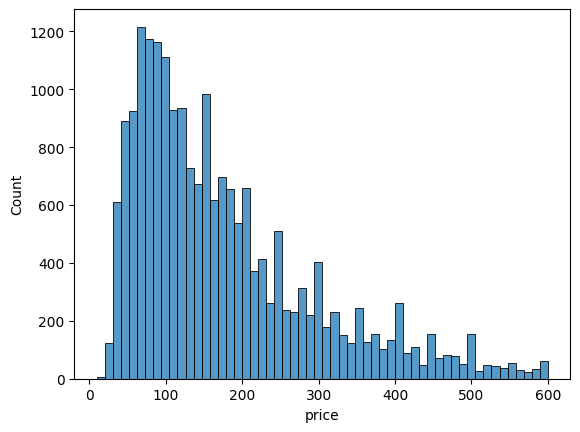

In [160]:
sns.histplot(data=df, x='price')

In [161]:
df['price'].mean()

175.50750706834356

In [162]:
df['price'].median()

143.0

In [163]:
df['price'].std()

119.5024809183471

In [164]:
X = df.drop('price', axis=1)
y = df['price']

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
from sklearn.decomposition import PCA

In [167]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [170]:
model_3 = Sequential()

model_3.add(Dense(175,activation='relu'))
model_3.add(Dense(88,activation='relu'))

model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [171]:
model_3.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 128,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

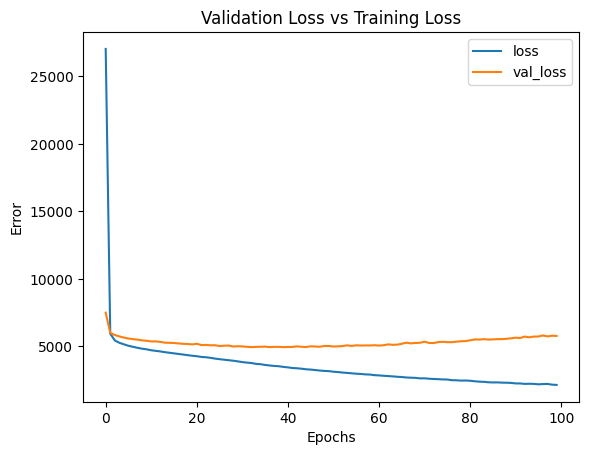

In [172]:
loss_plot(model_3)

In [173]:
predictions = model_3.predict(X_test)

193/193 [==============================] - 0s 1ms/step


In [174]:
mae_3 = mean_absolute_error(y_test, predictions)
mae_3

50.23599213369487

In [175]:
rmse_3 = np.sqrt(mean_squared_error(y_test,predictions))
rmse_3

75.90491043041222

In [176]:
df['price'].mean()

175.50750706834356

In [177]:
df['price'].median()

143.0

In [178]:
df['price'].std()

119.5024809183471

In [179]:
evs_3 = explained_variance_score(y_test,predictions)
evs_3

0.5988431334532016

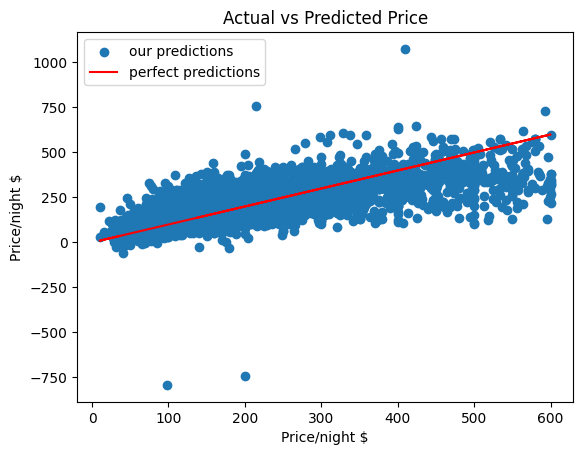

In [180]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [181]:
errors_3 = y_test.values.reshape(6155, 1) - predictions

C:\Users\riley\AppData\Local\Temp\ipykernel_11236\1510617466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_3)


<AxesSubplot: ylabel='Density'>

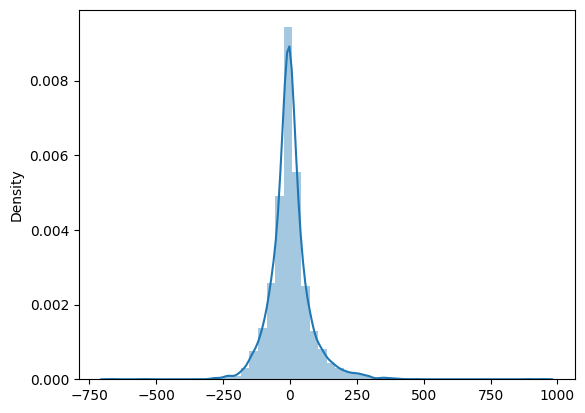

In [182]:
sns.distplot(errors_3)

### Model # 4

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [184]:
pca_X = PCA(n_components=175)
pca_X = pca_X.fit_transform(X_scaled)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [186]:
model_4 = Sequential()

model_4.add(Dense(175,activation='relu'))
model_4.add(Dense(88,activation='relu'))

model_4.add(Dense(1))

model_4.compile(optimizer='adam',loss='mse')

In [187]:
model_4.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 64, # batch size changed from 128 to 64
          validation_data=(X_test, y_test),
          verbose=0
          
          )

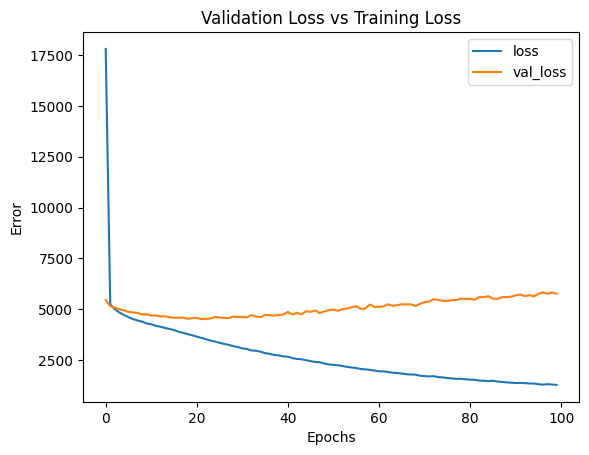

In [188]:
loss_plot(model_4)

In [189]:
predictions = model_4.predict(X_test)

193/193 [==============================] - 0s 755us/step


In [190]:
mae_4 = mean_absolute_error(y_test, predictions)
mae_4

51.31941882497794

In [191]:
rmse_4 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_4

75.89092876043959

In [192]:
df['price'].mean()

175.50750706834356

In [193]:
df['price'].median()

143.0

In [194]:
df['price'].std()

119.5024809183471

In [195]:
evs_4 = explained_variance_score(y_test, predictions)
evs_4

0.6034526782893903

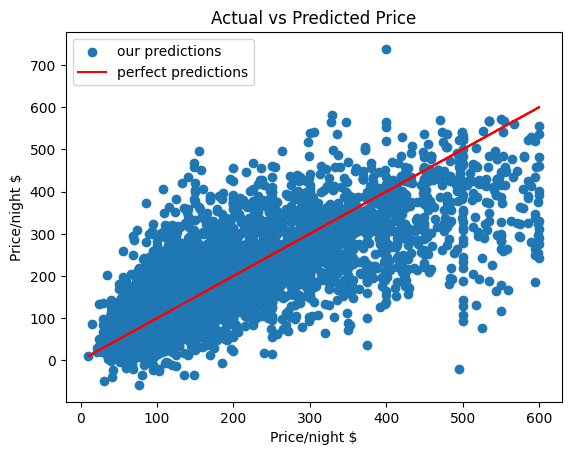

In [196]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [197]:
errors_4 = y_test.values.reshape(6155, 1) - predictions

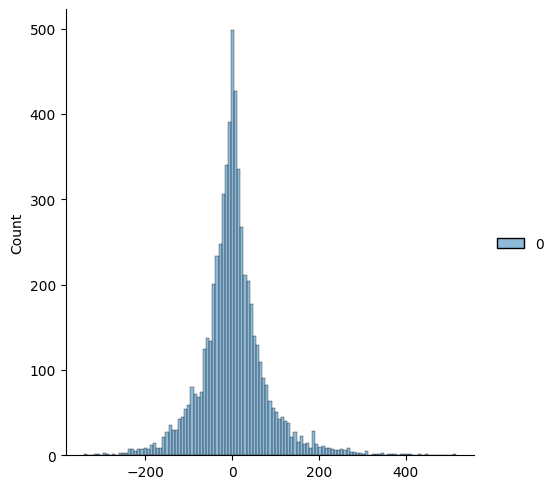

In [198]:
sns.displot(errors_4)

We are able to reduce the feature dataframe from 177 features to 151 principal components, or by 15%, while maintaining ~92% of the information in the features.

### Model # 5

In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [200]:
from sklearn.decomposition import PCA

In [201]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [203]:
# adding dropout layers
model_5 = Sequential()

model_5.add(Dense(175,activation='relu'))
model_5.add(Dropout(0.20))
model_5.add(Dense(88,activation='relu'))
model_5.add(Dropout(0.20))

model_5.add(Dense(1))

model_5.compile(optimizer='adam',loss='mse')

In [204]:
model_5.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

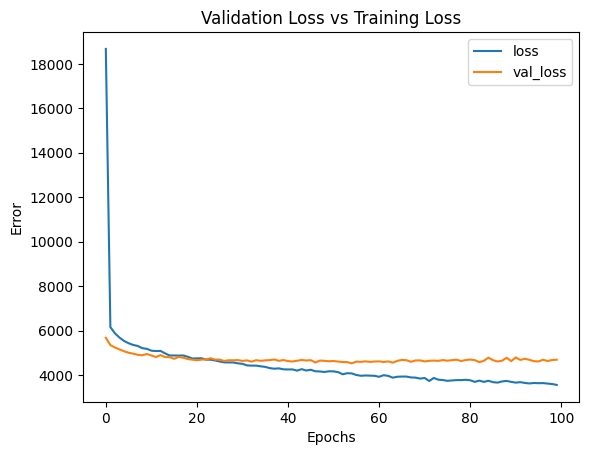

In [205]:
loss_plot(model_5)

In [206]:
predictions = model_5.predict(X_test)

193/193 [==============================] - 0s 713us/step


In [207]:
mae_5 = mean_absolute_error(y_test,predictions)
mae_5

46.981891583118085

In [208]:
rmse_5 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_5

68.48342146814937

In [209]:
df['price'].mean()

175.50750706834356

In [210]:
df['price'].median()

143.0

In [211]:
evs_5 = explained_variance_score(y_test, predictions)
evs_5

0.6631030401726905

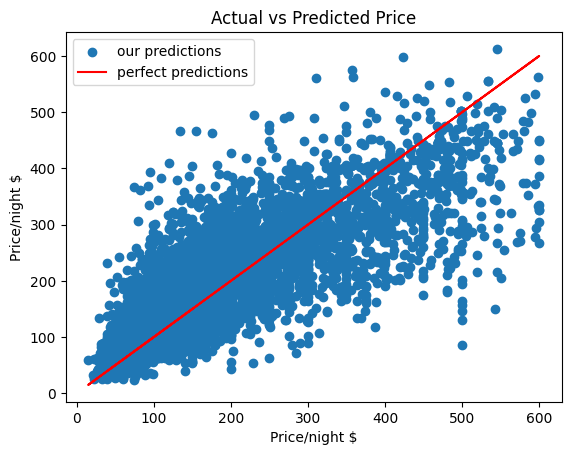

In [212]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [213]:
errors_5 = y_test.values.reshape(6155, 1) - predictions

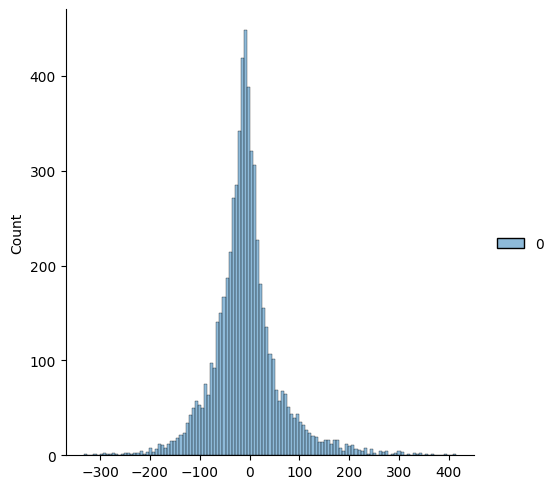

In [214]:
sns.displot(errors_5)

### Model # 6

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [216]:
from sklearn.decomposition import PCA

In [217]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = (train_test_split(pca_X, y, test_size=0.30))

In [220]:

model_6 = Sequential()

model_6.add(Dense(175,activation='relu'))
model_6.add(Dropout(0.20))


model_6.add(Dense(88,activation='relu'))
model_6.add(Dropout(0.20))

model_6.add(Dense(1))

model_6.compile(optimizer='adam',loss='mse')

In [221]:
model_6.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

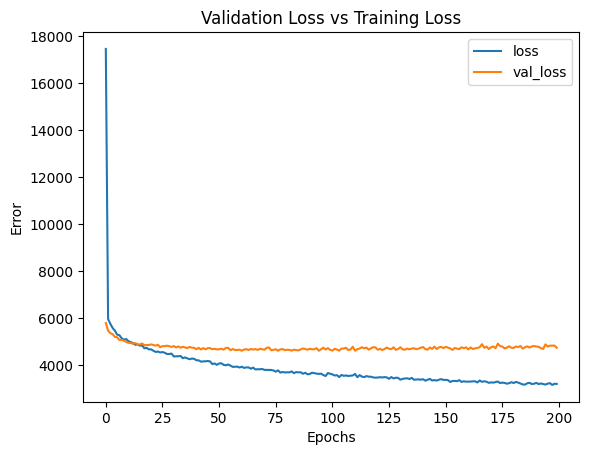

In [222]:
loss_plot(model_6)

In [223]:
predictions = model_6.predict(X_test)

193/193 [==============================] - 0s 766us/step


In [224]:
mae_6 = mean_absolute_error(y_test, predictions)
mae_6

46.354334236411525

In [225]:
rmse_6 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_6

68.85475076404869

In [226]:
evs_6 = explained_variance_score(y_test, predictions)
evs_6

0.6610565947341817

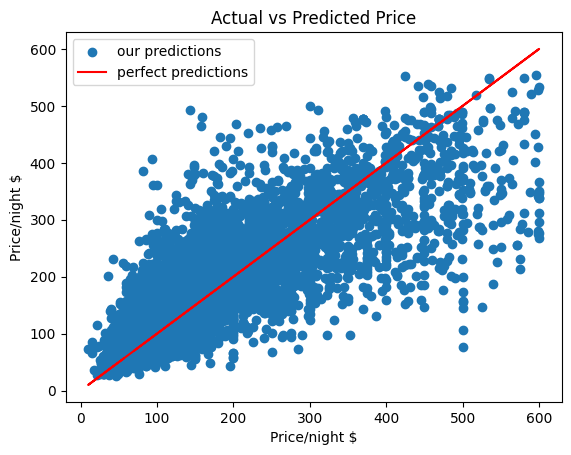

In [227]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [229]:
errors_6 = y_test.values.reshape(6155, 1) - predictions

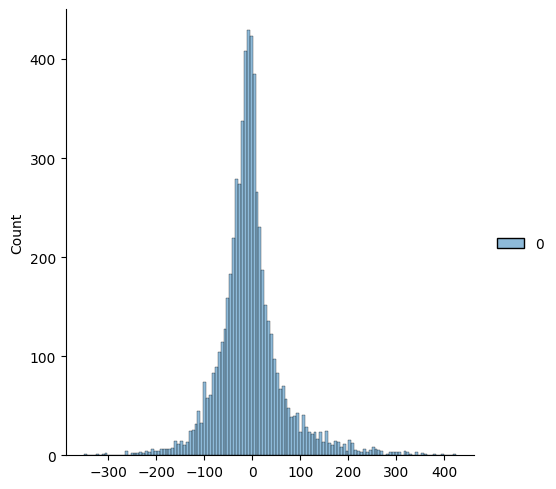

In [230]:
sns.displot(errors_6)

### Model # 7

In [231]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [232]:
from sklearn.decomposition import PCA

In [233]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [236]:

model_7 = Sequential()

model_7.add(Dense(175,activation='relu'))
model_7.add(Dropout(0.20))


model_7.add(Dense(88,activation='relu'))
model_7.add(Dropout(0.20))

model_7.add(Dense(1))

model_7.compile(optimizer='adam',loss='mse')

In [237]:
model_7.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0
          )

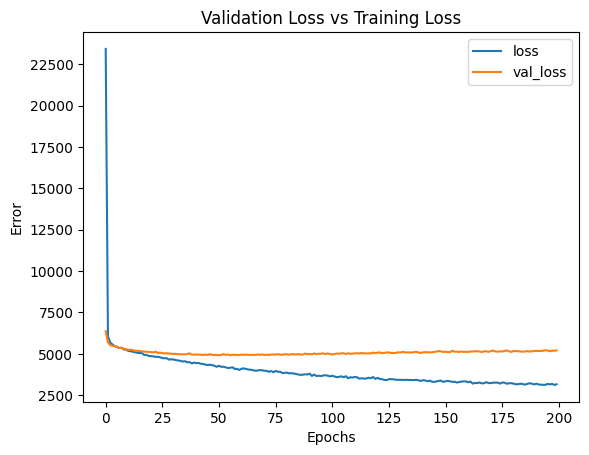

In [238]:
loss_plot(model_7)

In [239]:
predictions = model_7.predict(X_test)

193/193 [==============================] - 0s 908us/step


In [240]:
mae_7 = mean_absolute_error(y_test, predictions)
mae_7

48.76612666367903

In [241]:
rmse_7 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_7

72.19870233878211

In [242]:
evs_7 = explained_variance_score(y_test, predictions)
evs_7

0.6441960925027241

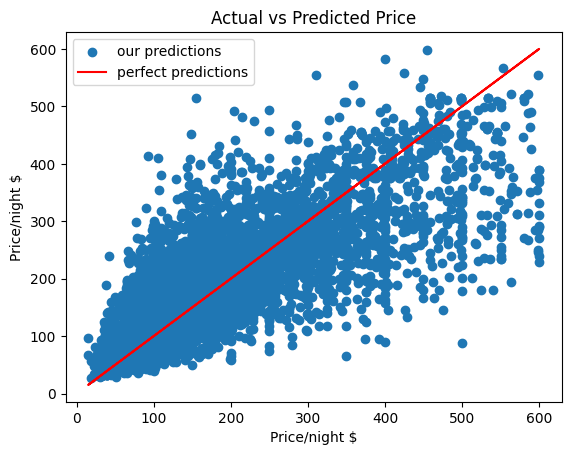

In [243]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [244]:
errors_7 = y_test.values.reshape(6155, 1) - predictions

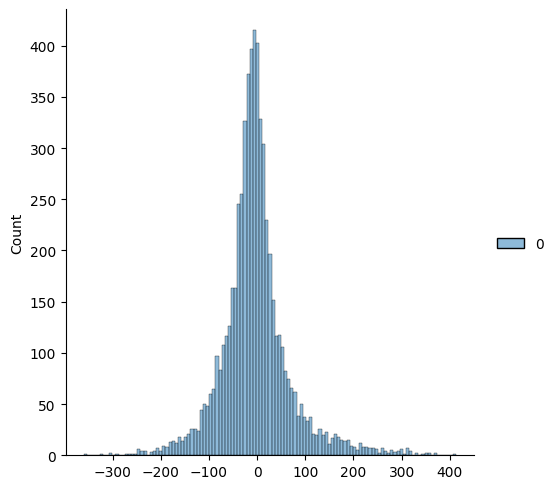

In [245]:
sns.displot(errors_7)

After evaluating our key metrics replacing the scaler from a normalizer to standardizer doesnt produce significant model performance changes

### Model # 8

In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [247]:
from sklearn.decomposition import PCA

In [248]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [251]:
# Removing the hidden layer
model_8 = Sequential()

model_8.add(Dense(175,activation='relu'))
model_8.add(Dropout(0.20))

model_8.add(Dense(1))

model_8.compile(optimizer='adam',loss='mse')

In [252]:
model_8.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0)

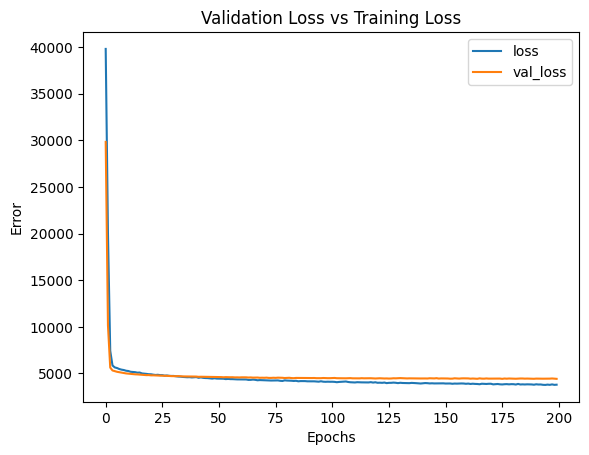

In [253]:
loss_plot(model_8)

In [254]:
predictions = model_8.predict(X_test)

193/193 [==============================] - 0s 892us/step


In [255]:
mae_8 = mean_absolute_error(y_test, predictions)
mae_8

44.975884167185455

In [256]:
rmse_8 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_8

66.51259026181901

In [257]:
evs_8 = explained_variance_score(y_test, predictions)
evs_8

0.6792093675317543

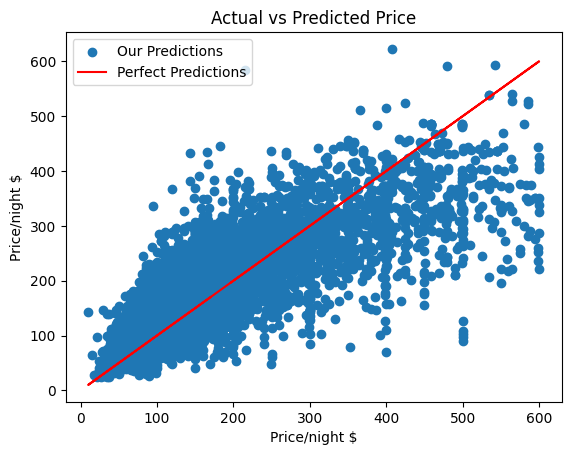

In [258]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [259]:
errors_8 = y_test.values.reshape(6155, 1) - predictions

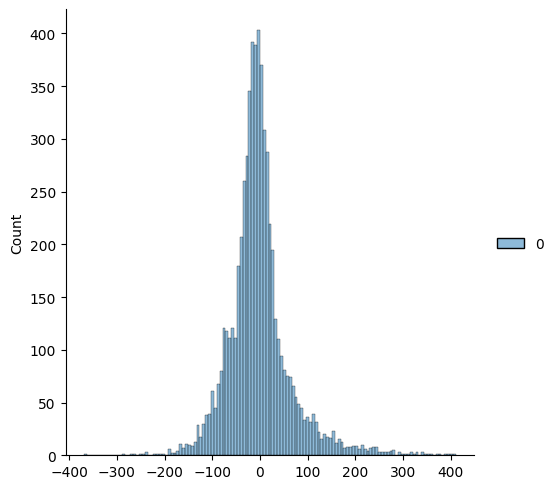

In [260]:
sns.displot(errors_8)

### Model # 9

In [261]:
from sklearn.preprocessing import StandardScaler

In [262]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [263]:
from sklearn.decomposition import PCA

In [264]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [267]:
model_9 = Sequential()

model_9.add(Dense(175,activation='relu'))
model_9.add(Dropout(0.20))

model_9.add(Dense(1))

model_9.compile(optimizer='adam',loss='mse')

In [268]:
model_9.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

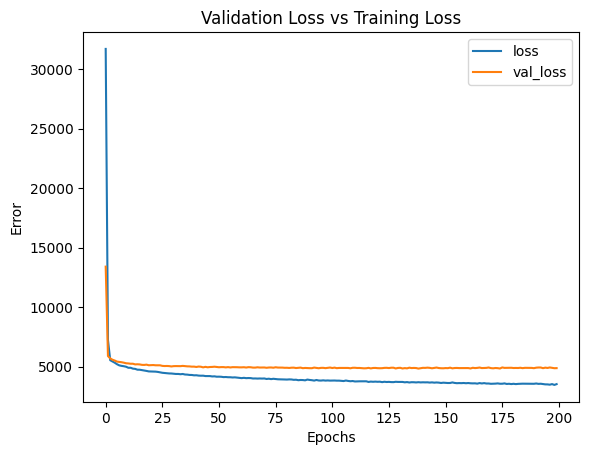

In [269]:
loss_plot(model_9)

In [270]:
predictions = model_9.predict(X_test)

193/193 [==============================] - 0s 785us/step


In [271]:
mae_9 = mean_absolute_error(y_test, predictions)
mae_9

46.40077271047014

In [272]:
rmse_9 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_9

69.88394731652822

In [273]:
df['price'].mean()

175.50750706834356

In [274]:
df['price'].median()

143.0

In [275]:
df['price'].std()

119.5024809183471

In [276]:
evs_9 = explained_variance_score(y_test, predictions)
evs_9

0.6569028461197841

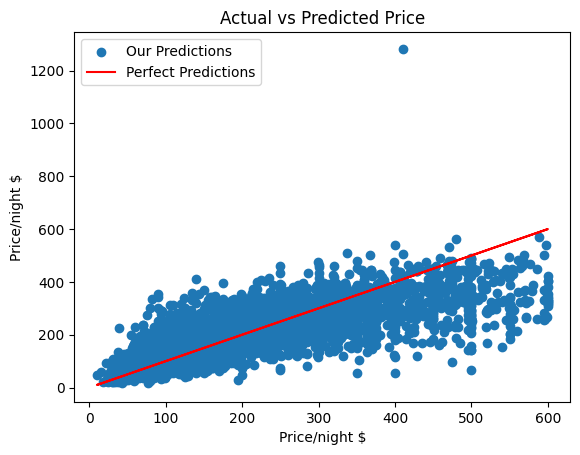

In [277]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

When evaluating the 9th iteration of our model where the learning rate (batchsize) is decreased form 64 to 32, our RMSE decreases from $67 per night to $65 per night, and pur R^2 increases from 67% to 70%


In [279]:
errors_9 = y_test.values.reshape(6155, 1) - predictions

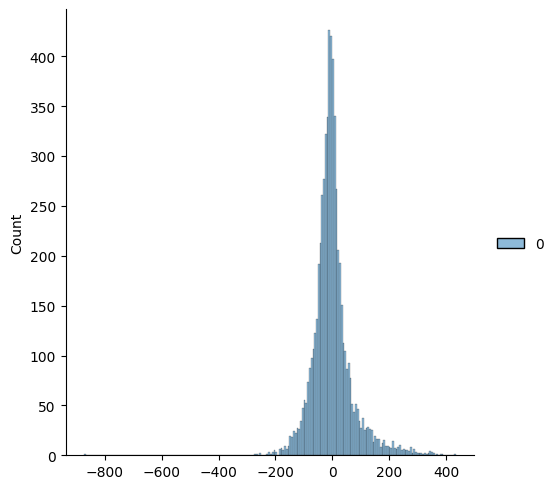

In [280]:
sns.displot(errors_9)

### Model # 10

In [281]:
from sklearn.preprocessing import StandardScaler

The standard scaler results in a distribution of each feature with a standard deviation of 1 and the mean 0. (normally distributed)

In [282]:
scaler=StandardScaler()

In [283]:
X_scaled = scaler.fit_transform(X)

In [284]:
from sklearn.decomposition import PCA

In [285]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [288]:
model_10 = Sequential()

model_10.add(Dense(175,activation='sigmoid')) # replacing relu with sigmoid
model_10.add(Dropout(0.20))

model_10.add(Dense(1))

model_10.compile(optimizer='adam',loss='mse')

In [289]:
model_10.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

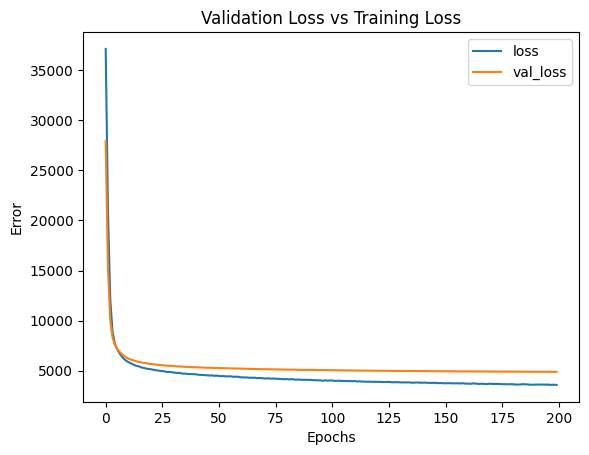

In [290]:
loss_plot(model_10)

In [291]:
predictions = model_10.predict(X_test)

193/193 [==============================] - 0s 1ms/step


In [292]:
mae_10 = mean_absolute_error(y_test, predictions)
mae_10


47.23457014082313

In [293]:
rmse_10 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_10

69.91675686402394

In [294]:
df['price'].mean()

175.50750706834356

In [295]:
df['price'].median()

143.0

In [296]:
df['price'].std()

119.5024809183471

In [297]:
evs_10 = explained_variance_score(y_test, predictions)

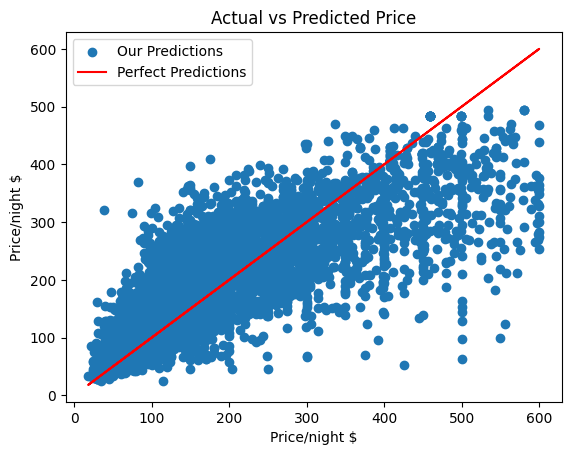

In [298]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [300]:
errors_10 = y_test.values.reshape(6155, 1) - predictions

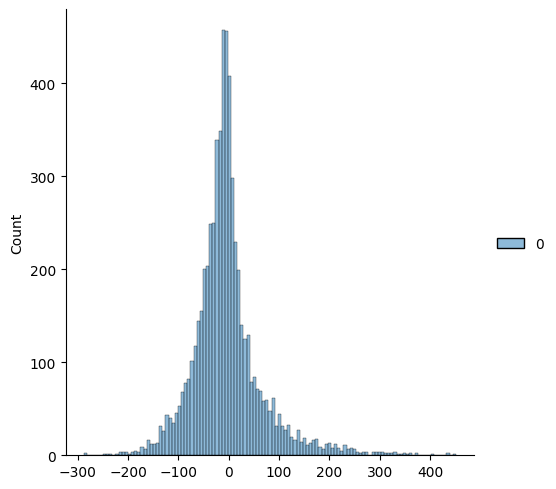

In [301]:
sns.displot(errors_10)

### Model # 11
 replacing the standard scaler with a robust scaler to reduce the impact of outliers. 
 
This happens because the feature vectors are transformed by substracting the median and then 
dividing by the IQR instead of the standard deviation that occurs in sklearn's StandardScaler

In [302]:
from sklearn.preprocessing import RobustScaler

In [303]:
scaler= RobustScaler()

In [304]:
X_scaled = scaler.fit_transform(X)

In [305]:
from sklearn.decomposition import PCA

In [306]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.30)

In [309]:
model_11 = Sequential()

model_11.add(Dense(175,activation='sigmoid'))
model_11.add(Dropout(0.20))

model_11.add(Dense(1))

model_11.compile(optimizer='adam',loss='mse')

In [310]:
model_11.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

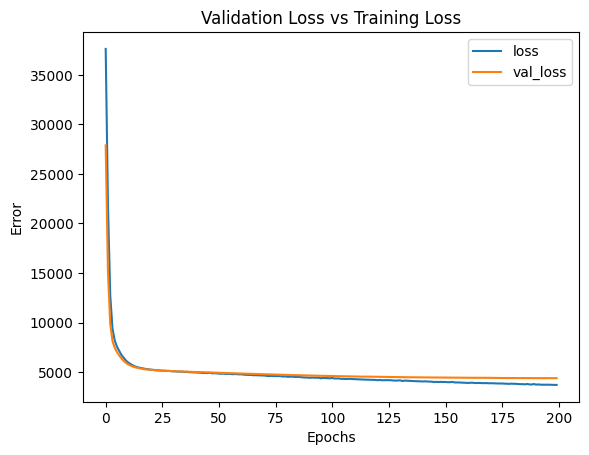

In [311]:
loss_plot(model_11)

In [312]:
predictions = model_11.predict(X_test)

193/193 [==============================] - 0s 964us/step


In [313]:
mae_11 = mean_absolute_error(y_test, predictions)
mae_11

44.58356156771402

In [314]:
rmse_11 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_11

66.2165981958822

In [315]:
evs_11 = explained_variance_score(y_test, predictions)
evs_11

0.6845428701970164

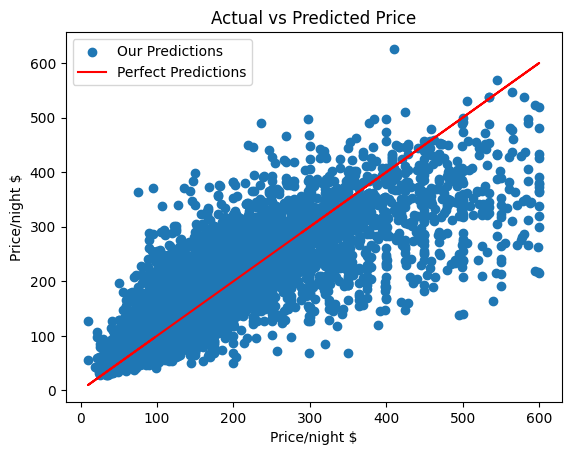

In [316]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [318]:
errors_11 = y_test.values.reshape(6155, 1) - predictions

Text(0.5, 9.444444444444438, 'Error')

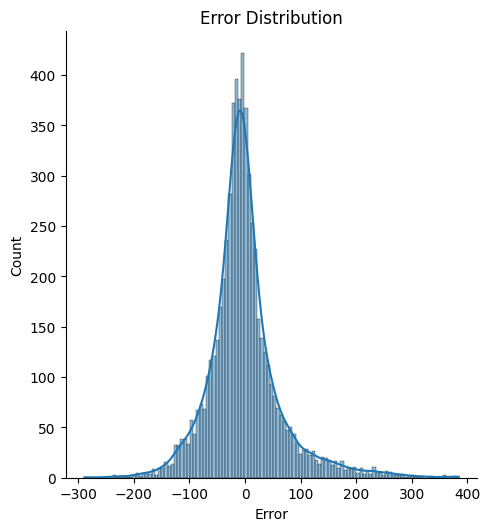

In [319]:
sns.displot(errors_11,legend=False,kde=True)
plt.title('Error Distribution')
plt.xlabel("Error")

### Model # 12

In [329]:
from sklearn.preprocessing import RobustScaler

In [330]:
scaler = RobustScaler()

In [331]:
X_scaled = scaler.fit_transform(X)

In [332]:
from sklearn.decomposition import PCA

In [333]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)

In [336]:
model_12 = Sequential()

model_12.add(Dense(175,activation='relu'))
model_12.add(Dropout(0.20))

model_12.add(Dense(1))

model_12.compile(optimizer='adam',loss='mse')

In [337]:
model_12.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

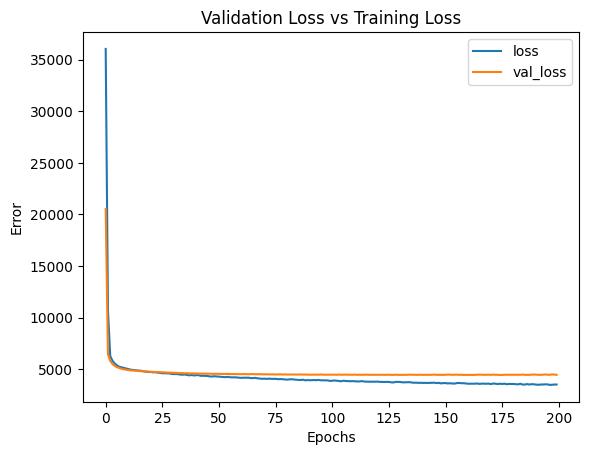

In [338]:
loss_plot(model_12)

In [339]:
predictions = model_12.predict(X_test)

193/193 [==============================] - 0s 834us/step


In [340]:
mae_12 = mean_absolute_error(y_test, predictions)

In [341]:
rmse_12 = np.sqrt(mean_squared_error(y_test, predictions))

In [342]:
evs_12 = explained_variance_score(y_test, predictions)

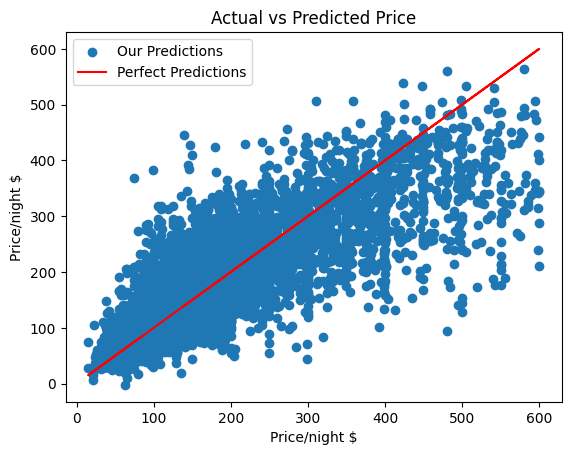

In [343]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [345]:
errors_12 = y_test.values.reshape(6155, 1) - predictions

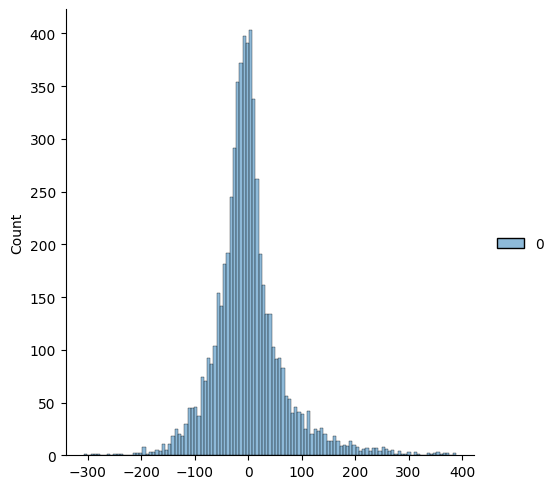

In [346]:
sns.displot(errors_12)

### Model # 13

In [347]:
from sklearn.preprocessing import RobustScaler

In [348]:
scaler = RobustScaler()

In [349]:
X_scaled = scaler.fit_transform(X)

In [350]:
from sklearn.decomposition import PCA

In [351]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.20)

In [354]:
model_13 = Sequential()

model_13.add(Dense(175,activation='relu'))
model_13.add(Dropout(0.20))

model_13.add(Dense(1))

model_13.compile(optimizer='adam',loss='mse')

In [355]:
model_13.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=13)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

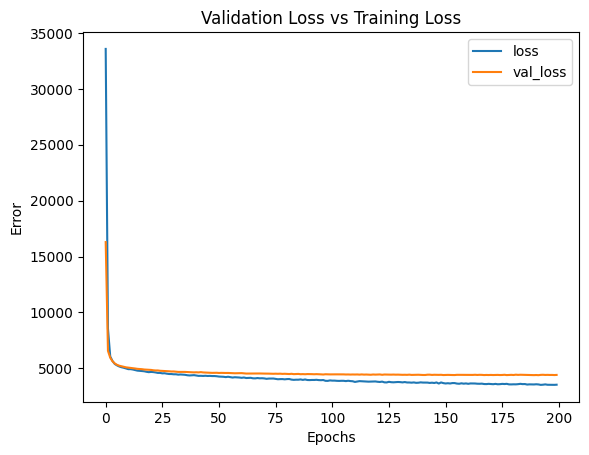

In [356]:
loss_plot(model_13)

In [357]:
predictions = model_13.predict(X_test)

129/129 [==============================] - 0s 732us/step


In [358]:
mae_13 = mean_absolute_error(y_test, predictions)
mae

86.07269710197326

In [359]:
rmse_13 = np.sqrt(mean_squared_error(y_test, predictions))

In [360]:
evs_13 = explained_variance_score(y_test, predictions)

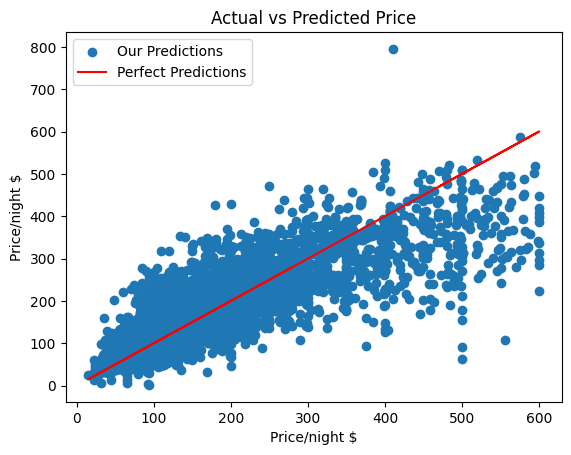

In [361]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [363]:
errors_13 = y_test.values.reshape(4103, 1) - predictions

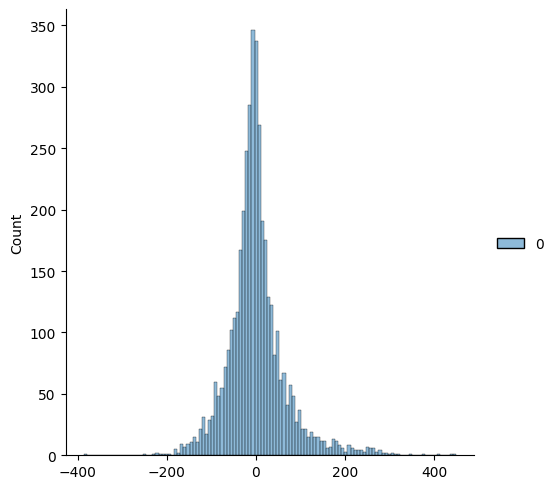

In [364]:
sns.displot(errors_13)

### Final Evaluation/ Comparing Results

Reducing the test size from 30% of the data to 20% resulted in slightly better model perfromance in model 13 compared to model 12 with a rmse of ~$65 per night and an explained variance score of ~68%

It appears that an underlying theme with all of our models is that we systemiclly underpredict the prices of higher prices listings (about > $300 per night). 

This could be due to some features in the error term not present in our model that appear in higher priced listings

In [365]:
model_results = [
["model_1", mae, rmse, evs],
["model_2", mae_2, rmse_2, evs_2],
["model_3", mae_3, rmse_3, evs_3],
["model_4", mae_4, rmse_4, evs_4],
["model_5", mae_5, rmse_5, evs_5],
["model_6", mae_6, rmse_6, evs_6],
["model_7", mae_7, rmse_7, evs_7],
["model_8", mae_8, rmse_8, evs_8],
["model_9", mae_9, rmse_9, evs_9],
["model_10", mae_10, rmse_10, evs_10],
["model_11", mae_11, rmse_11, evs_11],
["model_12", mae_12, rmse_12, evs_12],
["model_13", mae_13, rmse_13, evs_13]
]


In [366]:
framed_results = pd.DataFrame(model_results, columns=['model', 'mae', 'rmse', 'evs'])
framed_results

,model,mae,rmse,evs
0,model_1,86.072697,201.177887,0.396555
1,model_2,100.934709,248.400715,0.253535
2,model_3,50.235992,75.904910,0.598843
3,model_4,51.319419,75.890929,0.603453
4,model_5,46.981892,68.483421,0.663103
5,model_6,46.354334,68.854751,0.661057
6,model_7,48.766127,72.198702,0.644196
7,model_8,44.975884,66.512590,0.679209
8,model_9,46.400773,69.883947,0.656903
9,model_10,47.234570,69.916757,0.661544


After training and evaluating all iterations of the model on our key metrics, model_11 has the best performance. the scaler in model_11 was changed from sklearns StandardScaler to a RobustScaler to test the performsnce when the impact of outliers in our data was reduced. This resulted in a slightly lower root mean squared error, from ~$69 per night to ~$65 per night when compared to model_10. 

In [393]:
airbnb_price_predictions_model = tf.keras.models.load_model('airbnb_price_predictions_model')

In [394]:
airbnb_price_predictions_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 175)               28350     
                                                                 
 dropout_9 (Dropout)         (None, 175)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 176       
                                                                 
Total params: 28,526
Trainable params: 28,526
Non-trainable params: 0
_________________________________________________________________


In [395]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 175)               28350     
                                                                 
 dropout_9 (Dropout)         (None, 175)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 176       
                                                                 
Total params: 28,526
Trainable params: 28,526
Non-trainable params: 0
_________________________________________________________________
